# Import Libraries

In [205]:
import os                           ## Directory operations
import cv2                          # Image processing      
!pip install visualkeras            ## Keras libraray installation    
import visualkeras                  # A Keras Libary      
import numpy as np                  # numerical operations  
import pandas as pd                 # Dataframe Operations
import seaborn as sns               # Visulsations  
from PIL import Image               # Visualisation
import tensorflow as tf             # Tensorflow
from tensorflow import keras        # Keras
import matplotlib.pyplot as plt     # Visualisation
from sklearn.utils import shuffle   # SKlearn
from sklearn.utils import resample # SKlearn
from skimage.transform import resize # SKlearn
from sklearn.preprocessing import LabelEncoder          # SKlearn
from sklearn.preprocessing import StandardScaler        # SKlearn
from sklearn.neighbors import KNeighborsClassifier      # SKlearn 
from sklearn.model_selection import train_test_split    # SKlearn
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # SKlearn
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [206]:
from google.colab import drive
drive.mount('/content/drive')

## Importing of the google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset & Perform EDA

In [207]:
dir = '/content/drive/MyDrive/AIDI/archit/p3/archive(4)'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        label.append(os.path.split(dirname)[1])
        path.append(os.path.join(dirname,filename))
             
df = pd.DataFrame(columns=['Image','Label'])
df['Image']=path
df['Label']=label
df = df.reset_index(drop=True)
df

## Dataset Loading

,Image,Label
0,/content/drive/MyDrive/AIDI/archit/p3/archive(...,maleeyes
1,/content/drive/MyDrive/AIDI/archit/p3/archive(...,maleeyes
2,/content/drive/MyDrive/AIDI/archit/p3/archive(...,maleeyes
3,/content/drive/MyDrive/AIDI/archit/p3/archive(...,maleeyes
4,/content/drive/MyDrive/AIDI/archit/p3/archive(...,maleeyes
...,...,...
11521,/content/drive/MyDrive/AIDI/archit/p3/archive(...,femaleeyes
11522,/content/drive/MyDrive/AIDI/archit/p3/archive(...,femaleeyes
11523,/content/drive/MyDrive/AIDI/archit/p3/archive(...,femaleeyes
11524,/content/drive/MyDrive/AIDI/archit/p3/archive(...,femaleeyes


### Observing Dataset

In [208]:
# Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11526 entries, 0 to 11525
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   11526 non-null  object
 1   Label   11526 non-null  object
dtypes: object(2)
memory usage: 180.2+ KB


In [209]:
# Total number of samples
print("Number of rows in the Data")
len(df)

Number of rows in the Data


11526

In [210]:
# Check first 5 rows
print(df.head(10))

# Check last 5 columns
print(df.tail(10))

                                               Image     Label
0  /content/drive/MyDrive/AIDI/archit/p3/archive(...  maleeyes
1  /content/drive/MyDrive/AIDI/archit/p3/archive(...  maleeyes
2  /content/drive/MyDrive/AIDI/archit/p3/archive(...  maleeyes
3  /content/drive/MyDrive/AIDI/archit/p3/archive(...  maleeyes
4  /content/drive/MyDrive/AIDI/archit/p3/archive(...  maleeyes
5  /content/drive/MyDrive/AIDI/archit/p3/archive(...  maleeyes
6  /content/drive/MyDrive/AIDI/archit/p3/archive(...  maleeyes
7  /content/drive/MyDrive/AIDI/archit/p3/archive(...  maleeyes
8  /content/drive/MyDrive/AIDI/archit/p3/archive(...  maleeyes
9  /content/drive/MyDrive/AIDI/archit/p3/archive(...  maleeyes
                                                   Image       Label
11516  /content/drive/MyDrive/AIDI/archit/p3/archive(...  femaleeyes
11517  /content/drive/MyDrive/AIDI/archit/p3/archive(...  femaleeyes
11518  /content/drive/MyDrive/AIDI/archit/p3/archive(...  femaleeyes
11519  /content/drive/MyDrive/A

In [211]:
# check total count and frequency of each label
df.describe()

,Image,Label
count,11526,11526
unique,11526,2
top,/content/drive/MyDrive/AIDI/archit/p3/archive(...,maleeyes
freq,1,6324


There are total of 11525 Images in the entire dataset, having 2 labels [maleeyes, femaleeyes].

It is noticed that the count of male images is greater than the females

Checking the IsNA values

 Checking the duplicate data

 Maximum number of samples
maleeyes      6324
femaleeyes    5202
Name: Label, dtype: int64



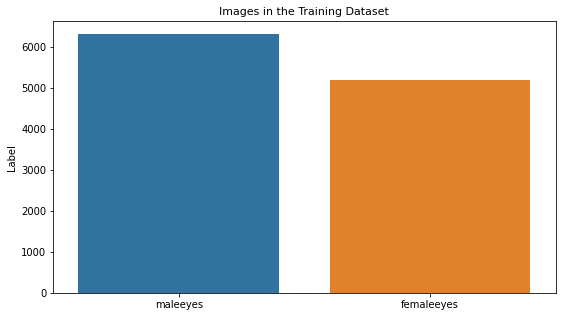

In [212]:
# check for null values or missing labels
print("Checking the IsNA values")
df.isna().sum()
# Checking the duplicate data
print("\n Checking the duplicate data")
df.duplicated().any()
# Maximum number of samples [Males, Females]
print("\n Maximum number of samples")
vc = df['Label'].value_counts()
print(vc)

print()
plt.figure(figsize = (9, 5))
sns.barplot(x = vc.index, y = vc)
plt.title("Images in the Training Dataset", fontsize = 11)
plt.show()

It is obseved that there is no any Nan values in the dataset that means no missing value in the whole dataset. 

2. We also checked the duplicacy of the data. There is no any dpulicate observation in the dataset


3. In the bar chart it is stats that the Maximum number of samples of males are 6324
and females are 5202.

In [213]:
import plotly.graph_objects as go
fig = go.Figure(go.Bar(
            x = df['Label'].value_counts(),
            y = df['Label'].unique(),
            orientation='h'))
fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)
fig.show()


In [214]:
import plotly.express as px
fig=px.pie(df['Label'].value_counts(),values= 'Label', names=df['Label'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Male vs Female',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In the above chart (bar chart and the pie chart), it is shown that the frequency of the male data is higher than the females. 

If we use the data as it is, it will lead to overfitting for the males observations and underfitting for the females observations. 


SO, we have to normalise both of the observations on a single values. 

**`So, we will depricate some of the males observations to the level of the females observations. `**

#### Balancing Dataset

In [215]:
# Using downsampling to balance the dataset, 
# as there is not a big difference in the total number of samples in both categories

# Dividing majority and minority classes
df_major = df[df.Label=='maleeyes']
df_minor = df[df.Label=='femaleeyes']

df_bal_data = resample(df_major,
               replace=False,  # Down sample without replacement
               n_samples=5202,   # Number to match minority class
               random_state=42)
  
# Combine both samples
df = pd.concat([df_bal_data, df_minor])
df = shuffle(df)
df = df.reset_index(drop=True)

# Display count of data points in both class
print(df.Label.value_counts())
df.describe()

femaleeyes    5202
maleeyes      5202
Name: Label, dtype: int64


,Image,Label
count,10404,10404
unique,10404,2
top,/content/drive/MyDrive/AIDI/archit/p3/archive(...,femaleeyes
freq,1,5202


As we discussed above, there are insignificant number of rows in both of the catoegory. 

To build a robust model, we scaled data to a normailised dataset.

So, we have 5202 rows for both of the cateogories. 

After scalling both of the categories, we then have to normalising the size of the images. 

Some of the images has high size while some of them has diminished size. 

So, we scaling all of the images to a unique size = 54 X 54 

### Observing the images

Here we can see that size of both images are not same, hence we will resize female images to 64 x 64

In [216]:
# Get index of male and female eye
xx = df[df['Label'] == 'femaleeyes'].index[0] # index of female eye
xy = df[df['Label'] == 'maleeyes'].index[0] # index of male eye

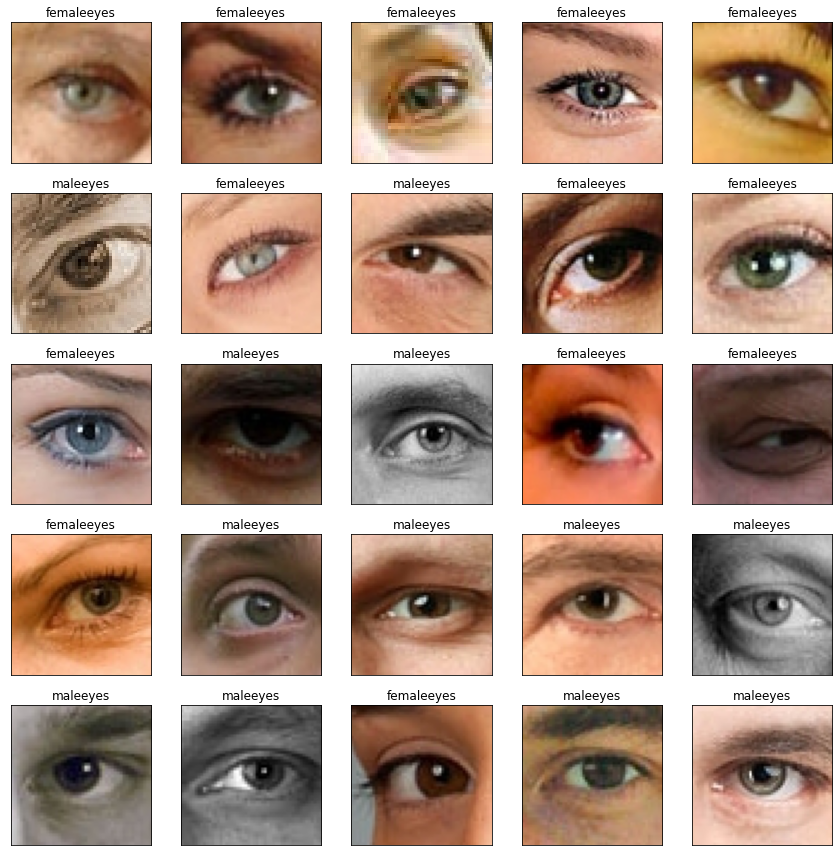

In [217]:
# plot more random images from dataset
fig, axes = plt.subplots(nrows = 5,
                        ncols = 5,
                        figsize = (12, 12),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["Image"][i]))
    ax.set_title(df["Label"][i])
plt.tight_layout()
plt.show()

Here all the images have varying sizes, we should resize all the images to equal size for better classification.

The dataset contains images with 65 different sizes, ranging from 41x41 to 117x117.
We will now resize them to 28x28 size.

In [264]:
# Convert image path to array of image using cv2
size = (28,28)
df_new = df.copy()

size_list = set()
for i in range(len(df)):
    image=cv2.imread(df['Image'][i])
    image=cv2.resize(image,size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    size_list.add(image.shape)
    df_new['Image'][i] = image.flatten()
    print(i)

df_new    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Streaming output truncated to the last 5000 lines.
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593

,Image,Label
0,"[201, 160, 112, 196, 152, 105, 199, 155, 108, ...",0
1,"[94, 53, 31, 117, 69, 48, 142, 89, 67, 135, 81...",0
2,"[199, 157, 109, 204, 162, 112, 227, 187, 137, ...",0
3,"[111, 67, 49, 107, 63, 44, 107, 63, 45, 123, 7...",0
4,"[214, 166, 85, 206, 157, 78, 218, 167, 89, 219...",0
...,...,...
10399,"[129, 76, 60, 132, 79, 65, 134, 85, 68, 136, 8...",1
10400,"[198, 124, 84, 205, 128, 89, 221, 142, 103, 22...",0
10401,"[64, 42, 21, 58, 37, 20, 53, 35, 19, 49, 31, 1...",1
10402,"[191, 191, 191, 188, 188, 188, 182, 182, 182, ...",1


In [219]:
df_new   

,Image,Label
0,"[201, 160, 112, 196, 152, 105, 199, 155, 108, ...",femaleeyes
1,"[94, 53, 31, 117, 69, 48, 142, 89, 67, 135, 81...",femaleeyes
2,"[199, 157, 109, 204, 162, 112, 227, 187, 137, ...",femaleeyes
3,"[111, 67, 49, 107, 63, 44, 107, 63, 45, 123, 7...",femaleeyes
4,"[214, 166, 85, 206, 157, 78, 218, 167, 89, 219...",femaleeyes
...,...,...
10399,"[129, 76, 60, 132, 79, 65, 134, 85, 68, 136, 8...",maleeyes
10400,"[198, 124, 84, 205, 128, 89, 221, 142, 103, 22...",femaleeyes
10401,"[64, 42, 21, 58, 37, 20, 53, 35, 19, 49, 31, 1...",maleeyes
10402,"[191, 191, 191, 188, 188, 188, 182, 182, 182, ...",maleeyes


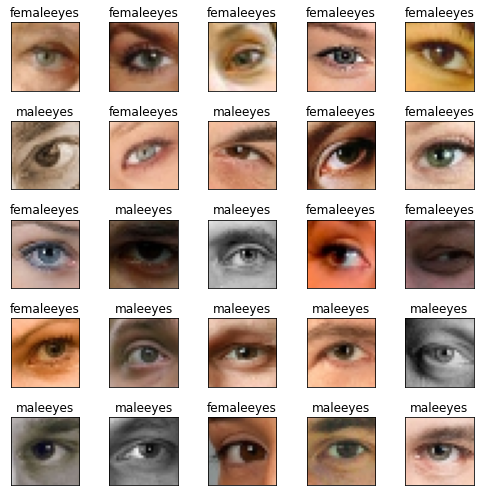

In [220]:
# Finally let's see some random images again

fig, axes = plt.subplots(nrows = 5,
                        ncols = 5,
                        figsize = (7, 7),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(df_new.Image[i].reshape(28,28,3))
    ax.set_title(df_new["Label"][i])
plt.tight_layout()
plt.show()

Fianlly, our all of the images are now scaled to a single data size. 

Our next duty is labelize the rows where the 1 for male and 0 for femaale observation. 


In [221]:
# Convert labels to numeric values
LE = LabelEncoder()
df['Label'] = np.asarray(LE.fit_transform(df["Label"]))
display(df.head())

,Image,Label
0,/content/drive/MyDrive/AIDI/archit/p3/archive(...,0
1,/content/drive/MyDrive/AIDI/archit/p3/archive(...,0
2,/content/drive/MyDrive/AIDI/archit/p3/archive(...,0
3,/content/drive/MyDrive/AIDI/archit/p3/archive(...,0
4,/content/drive/MyDrive/AIDI/archit/p3/archive(...,0


In the above section, we made our data for the best use of the modeling. 

Our dataset is ready for the KNN modeling. 

# KNN

In [222]:
# Restting the index and reshaping of the array 
def cleaned(X):
    for i in range(len(X)):
        X[i] = np.vstack(X[i].reset_index(drop=True))
    return X

In [223]:
# Split data into train and test
X_train, X_test,y_train, y_test = train_test_split(df_new.Image, df_new.Label, test_size = 0.2, random_state = 7)
X_train, X_test,y_train, y_test = cleaned([X_train, X_test,y_train, y_test])

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(8323, 2352) (2081, 2352)
(8323, 1) (2081, 1)


In [224]:
# Applying KNN multiple times to find best value of K

err_rate = []
acc = []
for i in range(11,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/n

Text(0, 0.5, 'Error Rate')

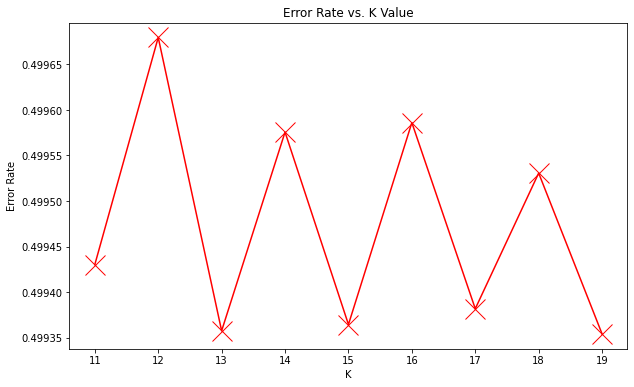

In [225]:
# Elbow plot to see optimum value of K
plt.figure(figsize=(10,6))
plt.plot(range(11,20),err_rate,color='RED',  marker='x', markerfacecolor='Black', markersize=20)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [226]:
# NOW WITH K=16
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [227]:
# Print accuracy
%time
print('KNN Accuracy: %.3f' % accuracy_score(y_test,pred))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
KNN Accuracy: 0.840


Text(0.5, 1.0, 'Accuracy Score: 0.8399807784718886')

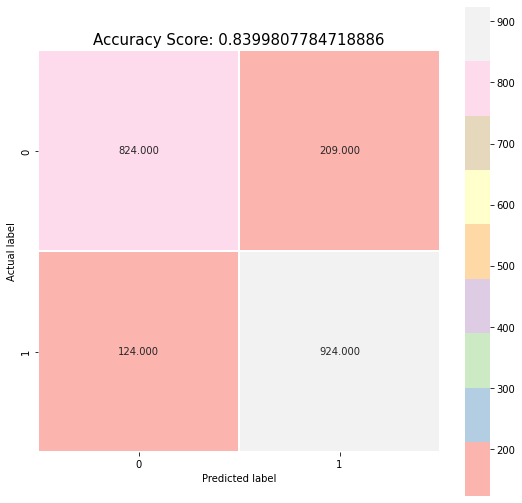

In [228]:
# Confusion Matrix
cm = confusion_matrix(y_test,pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap="Pastel1")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,pred))
plt.title(all_sample_title,size=15)

In [229]:
# Classification report
KNN_ = classification_report(y_test,pred, output_dict=True)
print(KNN_)
KNN_CM_ = confusion_matrix(y_test,pred)

{'femaleeyes': {'precision': 0.869198312236287, 'recall': 0.797676669893514, 'f1-score': 0.8319030792529026, 'support': 1033}, 'maleeyes': {'precision': 0.8155339805825242, 'recall': 0.8816793893129771, 'f1-score': 0.8473177441540577, 'support': 1048}, 'accuracy': 0.8399807784718886, 'macro avg': {'precision': 0.8423661464094057, 'recall': 0.8396780296032456, 'f1-score': 0.8396104117034802, 'support': 2081}, 'weighted avg': {'precision': 0.8421727381982557, 'recall': 0.8399807784718886, 'f1-score': 0.8396659667187414, 'support': 2081}}


#### Evaluting the confusion matrix 


In [230]:
KNN_CM_[0][0]
KNN_CM_[0][1]
P = KNN_CM_[0][0] + KNN_CM_[1][1]
ALL = KNN_CM_[0][0] + KNN_CM_[0][1] + KNN_CM_[1][0] + KNN_CM_[1][1]
KNN_ACC = P/ALL
KNN_ACC

0.8399807784718886

We can see from the confusion matrix that our KNN classifier has an accuracy of approx 83.7%, where from 2081 samples, the algorithm correctly identified 840 samples as True Positive, 901 as True Negatives, 193 as False Positive and 147 as False Negatives.

With an average precision of 84%, recall of 84% and f1-score and accuracy of about 0.84. 

# MLP


#### Train Val Test Split

In [265]:
X_train, X_val,y_train, y_val = train_test_split(df_new.Image, df_new.Label, test_size = 0.3, random_state = 7)
X_val, X_test,y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state = 7)
x_train, x_val, x_test, y_train, y_val, y_test = cleaned([X_train, X_val, X_test, y_train, y_val, y_test])

print("X Train: ",x_train.shape) 
print("X Val: ", x_val.shape) 
print("X Test: ", x_test.shape) 
print("y Train: ", y_train.shape) 
print("y Val: ", y_val.shape) 
print("y test: ", y_test.shape) 

X Train:  (7282, 2352)
X Val:  (1561, 2352)
X Test:  (1561, 2352)
y Train:  (7282, 1)
y Val:  (1561, 1)
y test:  (1561, 1)


In [266]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation=tf.nn.leaky_relu), # x if x > 0 else alpha*x 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') # [0, 1]
])

red = len(y_train[y_train>0])
blue = len(y_train) - red
total = len(y_train)
weight_for_red = total / (2 * red) 
weight_for_blue = total / (2 * blue)
class_weight = {0: weight_for_blue, 1: weight_for_red}
print(class_weight)

adam_optimizer = tf.keras.optimizers.Adam()
model.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=[
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
    ]
)

{0: 1.0016506189821184, 1: 0.9983548121743899}


In [267]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
history = model.fit(x_train_scaled, 
          y_train,
          class_weight=class_weight,
          batch_size=64,
          validation_split=0.1,
          epochs=80)

Epoch 1/80
103/103 [==============================] - 11s 41ms/step - loss: 1.6097 - tp: 2454.0000 - fp: 861.0000 - tn: 2392.0000 - fn: 846.0000 - accuracy: 0.7395 - precision: 0.7403 - recall: 0.7436 - auc: 0.7892 - val_loss: 1.0038 - val_tp: 316.0000 - val_fp: 118.0000 - val_tn: 264.0000 - val_fn: 31.0000 - val_accuracy: 0.7956 - val_precision: 0.7281 - val_recall: 0.9107 - val_auc: 0.8633
Epoch 2/80
103/103 [==============================] - 1s 13ms/step - loss: 0.7334 - tp: 2690.0000 - fp: 641.0000 - tn: 2612.0000 - fn: 610.0000 - accuracy: 0.8091 - precision: 0.8076 - recall: 0.8152 - auc: 0.8783 - val_loss: 0.4300 - val_tp: 292.0000 - val_fp: 55.0000 - val_tn: 327.0000 - val_fn: 55.0000 - val_accuracy: 0.8491 - val_precision: 0.8415 - val_recall: 0.8415 - val_auc: 0.9181
Epoch 3/80
103/103 [==============================] - 1s 13ms/step - loss: 0.5485 - tp: 2765.0000 - fp: 574.0000 - tn: 2679.0000 - fn: 535.0000 - accuracy: 0.8308 - precision: 0.8281 - recall: 0.8379 - auc: 0.901

In [268]:
# Evaluate model
x_test_scaled = scaler.fit_transform(x_test)
score = model.evaluate(x_test_scaled, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.5113822817802429
Test accuracy: 703.0


In [269]:
# Predictions 
y_pred = model.predict(x_test_scaled)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

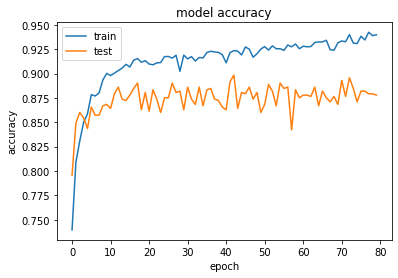

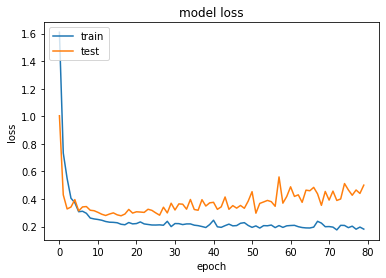

In [270]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [271]:
# Classification report
MLP_ = classification_report(y_test,y_pred, output_dict=True)
MLP_CM_ = confusion_matrix(y_test,y_pred)
print(MLP_)
MLP_CM_[0]




{'0': {'precision': 0.8998682476943346, 'recall': 0.8734015345268542, 'f1-score': 0.8864373783257625, 'support': 782}, '1': {'precision': 0.8765586034912718, 'recall': 0.9024390243902439, 'f1-score': 0.8893105629348514, 'support': 779}, 'accuracy': 0.8878923766816144, 'macro avg': {'precision': 0.8882134255928031, 'recall': 0.887920279458549, 'f1-score': 0.8878739706303069, 'support': 1561}, 'weighted avg': {'precision': 0.8882358243540489, 'recall': 0.8878923766816144, 'f1-score': 0.8878712097226108, 'support': 1561}}


array([683,  99])

In [272]:
MLP_CM_[0][0]
MLP_CM_[0][1]
P = MLP_CM_[0][0] + MLP_CM_[1][1]
ALL = MLP_CM_[0][0] + MLP_CM_[0][1] + MLP_CM_[1][0] + MLP_CM_[1][1]
MLP_ACC = P/ALL
MLP_ACC

0.8878923766816144

# CNN

In [236]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import layers

## importing of thr libraries

In [237]:
# Helper code
def to_tensor(_list):
    LIST = []
    for i in range(len(_list)):
        LIST.append(tf.convert_to_tensor(_list[i]))
    return LIST

# Function to reset the index and reshape the array 
def cleaned2(X):
    for i in range(len(X)):
        X[i] = np.stack(X[i].reset_index(drop=True))
    return X    

# Convert image path to array of image using cv2
size = (64,64)
df2 = df.copy()

for i in range(len(df)):
    image=cv2.imread(df['Image'][i])
    image=cv2.resize(image,size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    df2['Image'][i] = image
    
# Convert labels to numeric values

LE = LabelEncoder()

df2['Label'] = np.asarray(LE.fit_transform(df2["Label"]))
df2.Image[1].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(64, 64, 3)

In [238]:

x_train, x_val,y_train, y_val = train_test_split(df2.Image, df2.Label, test_size = 0.4, random_state = 7)
x_val, x_test,y_val, y_test = train_test_split(x_val, y_val, test_size = 0.5, random_state = 7)
x_train, x_val, x_test, y_train, y_val, y_test = cleaned2([x_train, x_val, x_test, y_train, y_val, y_test])
x_train, x_val, x_test, y_train, y_val, y_test = to_tensor([x_train, x_val, x_test, y_train, y_val, y_test])
print("X Train: ", x_train.shape) 
print("X Val: ", x_val.shape) 
print("X Test: ", x_test.shape) 
print("y Train: ", y_train.shape) 
print("y Val: ", y_val.shape) 
print("y test: ", y_test.shape) 

X Train:  (6242, 64, 64, 3)
X Val:  (2081, 64, 64, 3)
X Test:  (2081, 64, 64, 3)
y Train:  (6242,)
y Val:  (2081,)
y test:  (2081,)


In [239]:
# Alex-Net Architechture

CNN=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')  
])

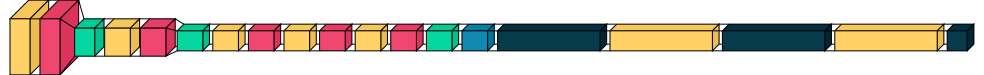

In [240]:
visualkeras.layered_view(CNN)

In [241]:

CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [242]:
r=CNN.fit(x_train,y_train,validation_data=(x_val,y_val),
            epochs=120  )

Epoch 1/120
196/196 [==============================] - 4s 15ms/step - loss: 0.6051 - accuracy: 0.7129 - val_loss: 0.5238 - val_accuracy: 0.7400
Epoch 2/120
196/196 [==============================] - 2s 10ms/step - loss: 0.3727 - accuracy: 0.8408 - val_loss: 0.3186 - val_accuracy: 0.8650
Epoch 3/120
196/196 [==============================] - 2s 12ms/step - loss: 0.3066 - accuracy: 0.8725 - val_loss: 0.3477 - val_accuracy: 0.8491
Epoch 4/120
196/196 [==============================] - 2s 13ms/step - loss: 0.2744 - accuracy: 0.8893 - val_loss: 0.3564 - val_accuracy: 0.8544
Epoch 5/120
196/196 [==============================] - 2s 12ms/step - loss: 0.2532 - accuracy: 0.8947 - val_loss: 0.2746 - val_accuracy: 0.8847
Epoch 6/120
196/196 [==============================] - 2s 12ms/step - loss: 0.2486 - accuracy: 0.8975 - val_loss: 0.4323 - val_accuracy: 0.8438
Epoch 7/120
196/196 [==============================] - 2s 12ms/step - loss: 0.2054 - accuracy: 0.9196 - val_loss: 0.4986 - val_accuracy:

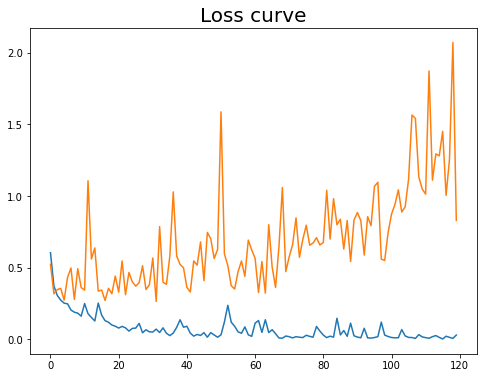

In [243]:
plt.figure(figsize=(8,6))
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Loss curve',fontdict={'size':20})
plt.show()


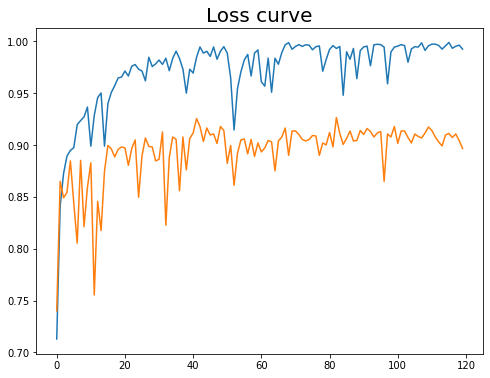

In [244]:
plt.figure(figsize=(8,6))
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Loss curve',fontdict={'size':20})
plt.show()

In [245]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [246]:
y_pred_CNN = CNN.predict(x_test)
y_pred_CNN = np.round(y_pred_CNN)

recall_CNN = recall_score(y_test, y_pred_CNN)
precision_CNN = precision_score(y_test, y_pred_CNN)
f1_CNN = f1_score(y_test, y_pred_CNN)
roc_CNN = roc_auc_score(y_test, y_pred_CNN)

In [247]:
CNN_ = (classification_report(y_test, y_pred_CNN))

CNN_CM_ = confusion_matrix(y_test,y_pred_CNN)

CNN_CM_[0][0]
CNN_CM_[0][1]
P = CNN_CM_[0][0] + CNN_CM_[1][1]
ALL = CNN_CM_[0][0] + CNN_CM_[0][1] + CNN_CM_[1][0] + CNN_CM_[1][1]
CNN_ACC = P/ALL
CNN_ACC

0.9058145122537242

In [248]:
CNN_



'              precision    recall  f1-score   support\n\n           0       0.90      0.91      0.90      1030\n           1       0.91      0.91      0.91      1051\n\n    accuracy                           0.91      2081\n   macro avg       0.91      0.91      0.91      2081\nweighted avg       0.91      0.91      0.91      2081\n'

In [249]:
report = classification_report(y_test,y_pred_CNN, output_dict=True)
rpt = pd.DataFrame(report).transpose()
CNN_df = rpt.iloc[4]
print(rpt)

              precision    recall  f1-score      support
0              0.904070  0.905825  0.904947  1030.000000
1              0.907531  0.905804  0.906667  1051.000000
accuracy       0.905815  0.905815  0.905815     0.905815
macro avg      0.905800  0.905815  0.905807  2081.000000
weighted avg   0.905818  0.905815  0.905815  2081.000000


In [250]:
rpt = pd.DataFrame(KNN_).transpose()
KNN_df = rpt.iloc[4]

rpt = pd.DataFrame(MLP_).transpose()
MLP_df = rpt.iloc[4]

rpt = pd.DataFrame(report).transpose()
CNN_df = rpt.iloc[4]


output = pd.DataFrame([KNN_df,  MLP_df, CNN_df],
                      index=['KNN', 'MLP', 'CNN']
)
output






,precision,recall,f1-score,support
KNN,0.842173,0.839981,0.839666,2081.0
MLP,0.897510,0.897502,0.897493,1561.0
CNN,0.905818,0.905815,0.905815,2081.0


In the above table, it can be ntocied that three of them has their own score of accuracy, and other parameters. 

Howver, the CNN model score the best score of accuracy as compared to the KNN and MLP.

The CNN acquired an accuracy of 90 percent while the other two model acquires the accuracy of the 89 percent and 84 percent. 

Thus, the **CNN wins**.